In [1]:
from pathlib import Path
from datatree import DataTree
import xarray as xr
import pandas as pd
import numpy as np

import valenspy as vp
from valenspy.cf_checks import cf_status, is_cf_compliant

In [2]:
levels = ["level01", "level02", "level03", "level04"]
data_tree = {}
for level in levels:
    print(level)
    files = list(Path(f"/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc45263_wout/DYDOCASE/export/long/{level}/pr/output/").rglob('*2021_??.nc'))
    ds = xr.open_mfdataset(files, combine='by_coords', chunks="auto")
    data_tree[level] = ds

level01
level02
level03
level04


In [3]:
dt = DataTree.from_dict(data_tree)
dt

DataTree('None', parent=None)
├── DataTree('level01')
│       Dimensions:             (time: 8760, y: 251, x: 251, bnds: 2)
│       Coordinates:
│         * x                   (x) float64 2kB -3.125e+06 -3.1e+06 ... 3.125e+06
│         * y                   (y) float64 2kB 2.974e+06 2.999e+06 ... 9.224e+06
│         * time                (time) datetime64[ns] 70kB 2021-01-01T01:00:00 ... 20...
│           time_bnds           (time, bnds) datetime64[ns] 140kB dask.array<chunksize=(744, 2), meta=np.ndarray>
│           lon                 (y, x) float64 504kB dask.array<chunksize=(251, 251), meta=np.ndarray>
│           lat                 (y, x) float64 504kB dask.array<chunksize=(251, 251), meta=np.ndarray>
│           lambert_projection  int64 8B 0
│       Dimensions without coordinates: bnds
│       Data variables:
│           pr                  (time, y, x) float64 4GB dask.array<chunksize=(528, 178, 178), meta=np.ndarray>
│       Attributes:
│           Conventions:  CF-1.11
│           title:        Climate model data
│           institution:  Ghent University
│           source:       ALARO-1 (CY43T2) - SURFEX v8.0
│           history:      2024-04-24 14:50:48.059273 Python
│           references:   
│           comments:     
├── DataTree('level02')
│       Dimensions:             (time: 8760, y: 499, x: 499, bnds: 2)
│       Coordinates:
│         * x                   (x) float64 4kB -3.112e+06 -3.1e+06 ... 3.112e+06
│         * y                   (y) float64 4kB 2.986e+06 2.999e+06 ... 9.211e+06
│         * time                (time) datetime64[ns] 70kB 2021-01-01T01:00:00 ... 20...
│           time_bnds           (time, bnds) datetime64[ns] 140kB dask.array<chunksize=(744, 2), meta=np.ndarray>
│           lon                 (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
│           lat                 (y, x) float64 2MB dask.array<chunksize=(499, 499), meta=np.ndarray>
│           lambert_projection  int64 8B 0
│       Dimensions without coordinates: bnds
│       Data variables:
│           pr                  (time, y, x) float64 17GB dask.array<chunksize=(334, 224, 224), meta=np.ndarray>
│       Attributes:
│           Conventions:  CF-1.11
│           title:        Climate model data
│           institution:  Ghent University
│           source:       ALARO-1 (CY43T2) - SURFEX v8.0
│           history:      2024-04-24 14:53:43.424914 Python
│           references:   
│           comments:     
├── DataTree('level03')
│       Dimensions:             (time: 8760, y: 421, x: 421, bnds: 2)
│       Coordinates:
│         * x                   (x) float64 3kB -8.4e+05 -8.36e+05 ... 8.36e+05 8.4e+05
│         * y                   (y) float64 3kB 5.572e+06 5.576e+06 ... 7.252e+06
│         * time                (time) datetime64[ns] 70kB 2021-01-01T01:00:00 ... 20...
│           time_bnds           (time, bnds) datetime64[ns] 140kB dask.array<chunksize=(744, 2), meta=np.ndarray>
│           lon                 (y, x) float64 1MB dask.array<chunksize=(421, 421), meta=np.ndarray>
│           lat                 (y, x) float64 1MB dask.array<chunksize=(421, 421), meta=np.ndarray>
│           lambert_projection  int64 8B 0
│       Dimensions without coordinates: bnds
│       Data variables:
│           pr                  (time, y, x) float64 12GB dask.array<chunksize=(374, 211, 211), meta=np.ndarray>
│       Attributes:
│           Conventions:  CF-1.11
│           title:        Climate model data
│           institution:  Ghent University
│           source:       ALARO-1 (CY43T2) - SURFEX v8.0
│           history:      2024-04-25 08:02:05.386291 Python
│           references:   
│           comments:     
└── DataTree('level04')
        Dimensions:             (time: 8760, y: 421, x: 421, bnds: 2)
        Coordinates:
          * x                   (x) float64 3kB -2.73e+05 -2.717e+05 ... 2.73e+05
          * y                   (y) float64 3kB 6.098e+06 6.099e+06 ... 6.644e+06
          * time

In [4]:
cf_status(dt.level02.ds)

The file is NOT ValEnsPy CF compliant.
0.00% of the variables are ValEnsPy CF compliant
NOT ValEnsPy CF compliant: ['pr']
The following attributes are missing or incorrect for the variable pr:
Attribute       Actual                    Expected                 
-----------------------------------------------------------------
units           mm/h                      kg m-2 s-1               


In [ ]:
EOBS_data_dir = Path("/dodrio/scratch/projects/2022_200/project_input/External/observations/EOBS/0.1deg/")

EOBS_obs_files = list(EOBS_data_dir.glob("*rr*mean*.nc")) #Select all the netCDF files in the directory
EOBS_ds = xr.open_mfdataset(EOBS_obs_files, combine='by_coords', chunks='auto')

EOBS_ds

In [13]:
def daily_cycle(ds):
    return ds.groupby('time.hour').mean('time')

def plot_daily_cycle(ds):
    ds.plot.line(x='hour')

In [12]:
dt["/"].groupby("time.hour")

AttributeError: 'DataTree' object has no attribute 'groupby'

In [6]:
dt.map(daily_cycle)

AttributeError: DatasetView objects are not to be initialized directly

In [10]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler
with ProgressBar():
    ds_p = daily_cycle(ds).compute()

[########################################] | 100% Completed | 107.50 s


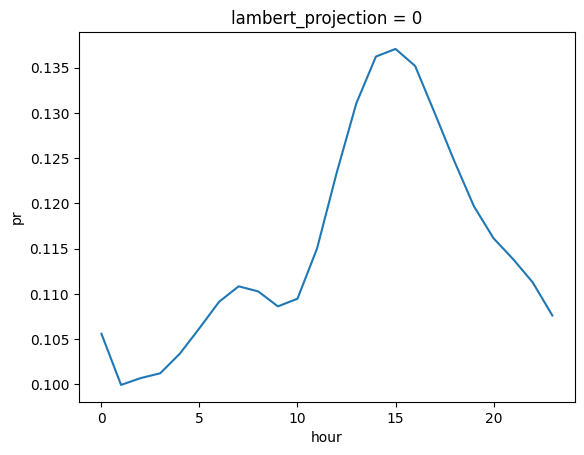

In [16]:
ds_p.mean(dim=['x','y']).pr.plot()